**Eithar Elfatih Burie Abdelrahaman** - DS2403

In [486]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import stats
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import skew
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression


import warnings 
warnings.filterwarnings('ignore')

Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


In [215]:
#Provide specific aims to manipulate data appropriately to get specific outcomes from given data.

__

In [216]:
#Import data from given url 
wine_data_url=('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')


#show data 
wine_df=pd.read_csv(wine_data_url)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


There are 12 attributes available in this data set. All attributes are numerical. 11 are physiochemical and 1 is sensory.

__

In [278]:
#show head
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [279]:
#show tail
wine_df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


__Exploratory Data Analysis__ (EDA)

In [280]:
#check attributes
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [281]:
#Check dimension
wine_df.shape

(1599, 12)

__

In [221]:
#show info  
# Checking data types , do they need converting?
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


__

In [222]:
#Check for null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [223]:
#Check for null values
wine_df.isnull().sum().sum()

0

In [286]:
#check and handle(if any) duplicate values
wine_df.duplicated()
wine_df.duplicated().value_counts()


False    1359
True      240
dtype: int64

In [287]:
# drop duplicates
wine_df2=wine_df.drop_duplicates(inplace=False)
wine_df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Above we can see that :

    1. The data set has a dimension of 1359 rows and 12 columns 
    2. and the columns are:
    
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol',
        'quality'
    3.  All attributes are numerical. 11 attributes are 'float64' while the 'Quality' attribute is 'int64' No conversion needed
    4. There are no nun values, therefore no need to handle
    5. as we can see above there were 240 duplicate values so now they have been handled and dropped    
    

In [360]:
#describe data 
wine_df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



    •	A total of 1359 different wines are represented in the dataset
    •	Each wine is characterised by 12 measured variable, both physiochemical properties and overall quality.
    •	Fixed acidity, which is a key property, exhibits considerable variation, with an verage of 8.31
    •	Other properties also display a diverse range of values, highlight the complexity of wine composition
    •	The quality, an essential measure, and as stated in the problem statement is our independ variable, is rated on a scale of 3 to 8. 
Understanding the relationship between these attributes and the quality will provide valuable insights that influence overall quality and taste of wine


__

In [361]:
#check skew
wine_df2.apply(skew).sort_values()


density                 0.044728
quality                 0.192194
pH                      0.231776
citric acid             0.312380
volatile acidity        0.728474
alcohol                 0.858892
fixed acidity           0.940002
free sulfur dioxide     1.225225
total sulfur dioxide    1.538667
sulphates               2.403848
residual sugar          4.543132
chlorides               5.496412
dtype: float64

__COMMENT__: the above table suggests the following:

    . density, ph and citric acid have the lowest skewness
    . chlorides, residual sugar and sulphates have the highest skewness

In [362]:

#count unique values
wine_df2.nunique().sort_values()


quality                   6
free sulfur dioxide      60
alcohol                  65
citric acid              80
pH                       89
residual sugar           91
fixed acidity            96
sulphates                96
volatile acidity        143
total sulfur dioxide    144
chlorides               153
density                 436
dtype: int64

__COMMENT__: the above table suggests the following:

    . free sulfur dioxide, alchohol, and citric acid have the shortest scale ranges
    . density,chlorides,total sulfur dioxide and volatile acidity have the widest range of scale of measure

In [364]:
#count unique values
wine_df2.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [365]:
#show unique values
wine_df2['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [366]:
#show unique value counts
wine_df2['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

__comment__: this suggests that 5 and 6 have the highest quality values, while 7 and 3 are significantly less, as well as 8 and 3 being the least (bothe the highest and lowest score)

__

From the above table, we can see that each attribute has various amounts of unique values, which suggests that there are no two categories alike, that all seem to have very different scales of counting the specific attribute. 

to get a better idea, this can be visualised  as follows

# 2- Data visualization 

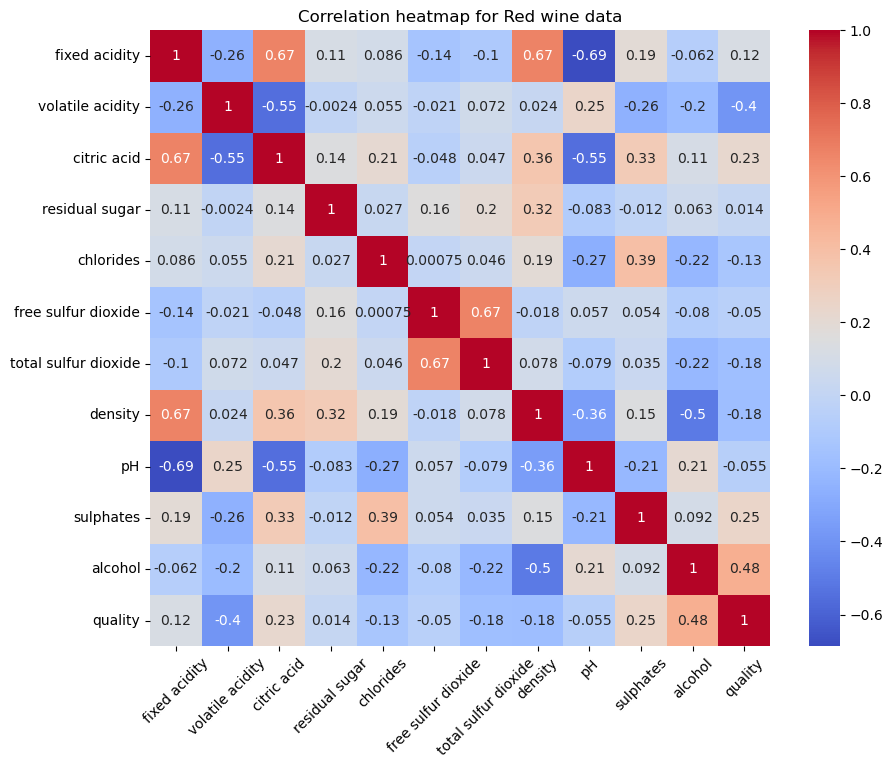

In [367]:
#heat map and correlation table to show the relation ships visually and numerically 
corr_=wine_df2.corr()
plt.figure(figsize=(10,8))
heatmap=sns.heatmap(corr_, annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)

plt.title('Correlation heatmap for Red wine data')
plt.show()


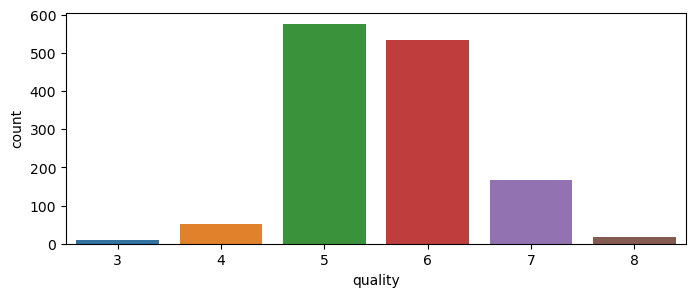

In [368]:
#visualize 'quality'

plt.figure(figsize=(8,3))
qual_bar=sns.countplot(x='quality', data=wine_df2)
plt.show()

__comment__: this shows the quality of 5 and 6 seem to be much higher than the rest. this is visble in the above countplot there is a large imbalance.

In [376]:
wine_df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

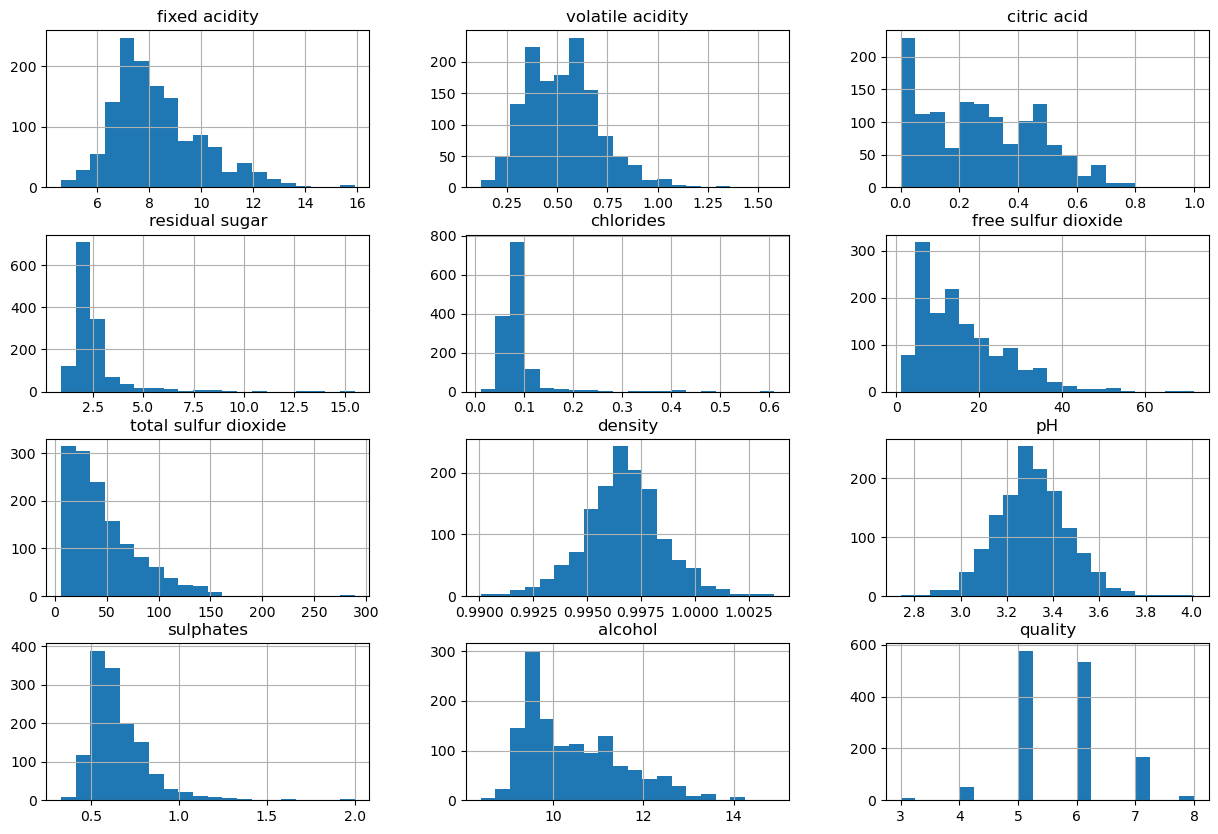

In [371]:
#histogram of each attribute 
wine_df2.hist(bins=20, figsize=(15,10))

plt.show()

from the above, we can say:

    Normally distributed -

    .fixed acidity 
    .volatile acidity  
    .residual sugar- is rather normally distributed (with skewness to the right)
    .chlorides-is normally distributed
    .density-  normal distribution 
    .ph -  normal distribution
    .sulphates- normal distribution (right skewness)
    .alcohcol- normal distribution 
    .quality- normal  distribution
     .free sulfur dioxide-seems normally distributed (slight right skewness) will this be significant???
    
    Right skewness
    
    .citric acid - right skewness
    .total sulfur dioxide -  right sknewness
    
    
    
    

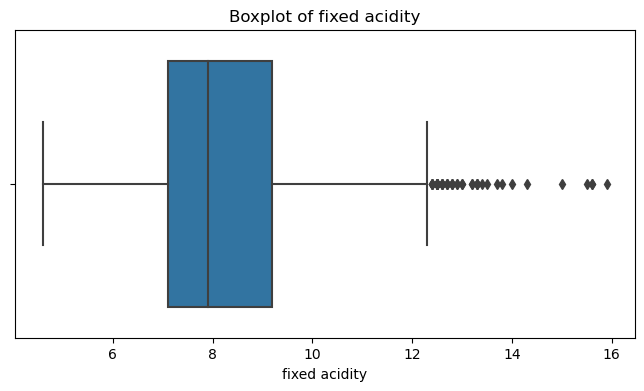

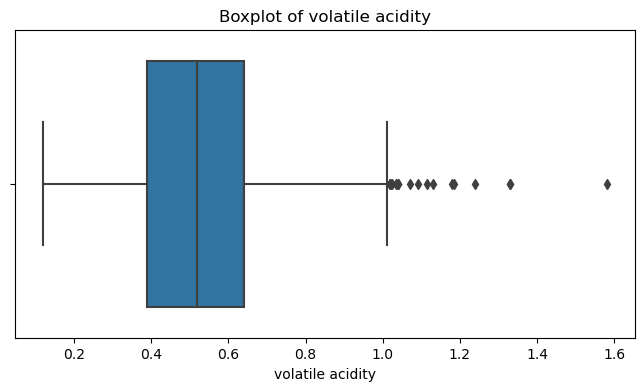

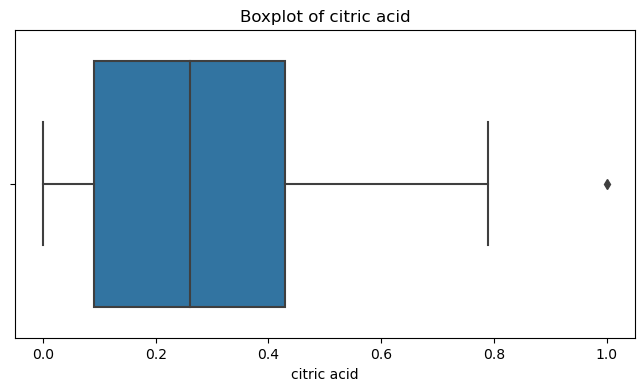

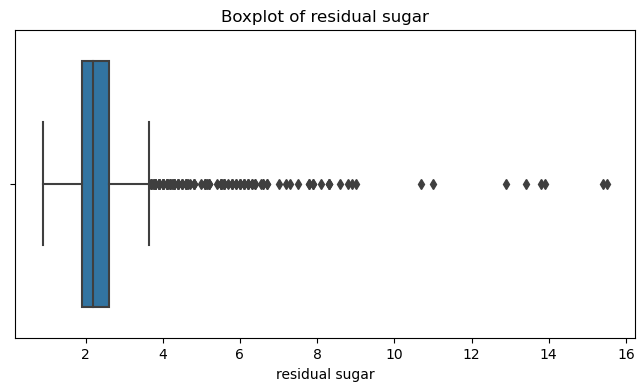

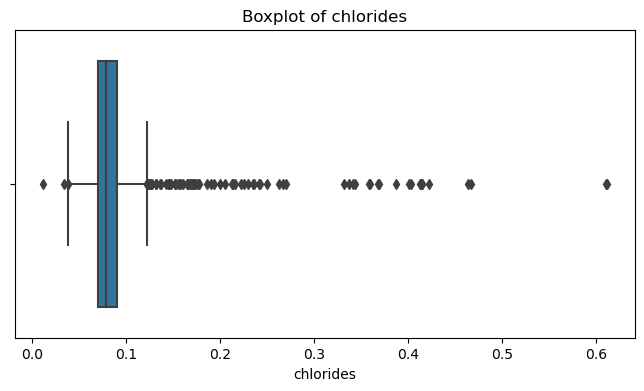

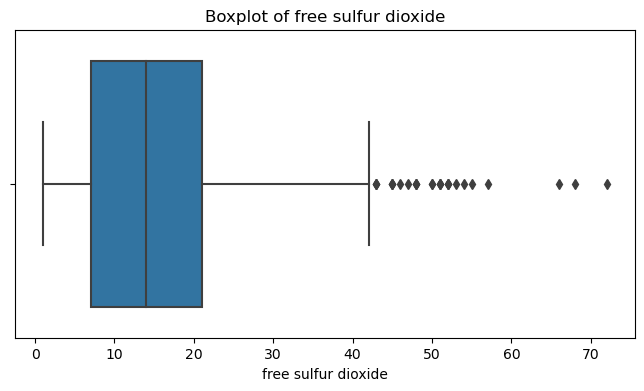

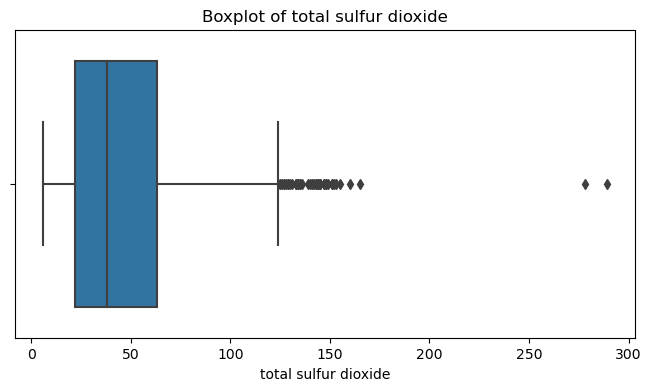

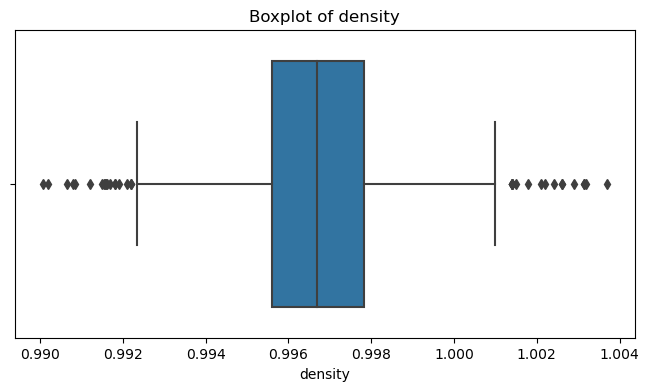

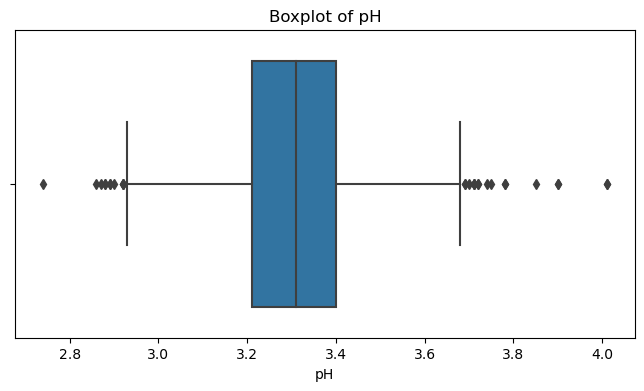

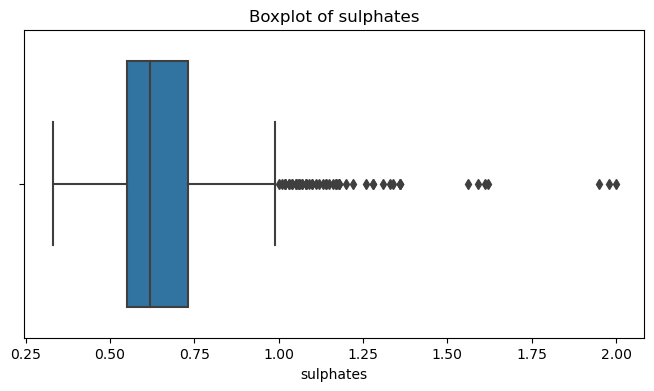

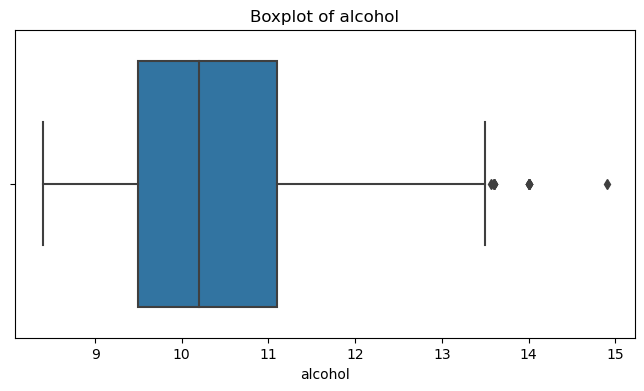

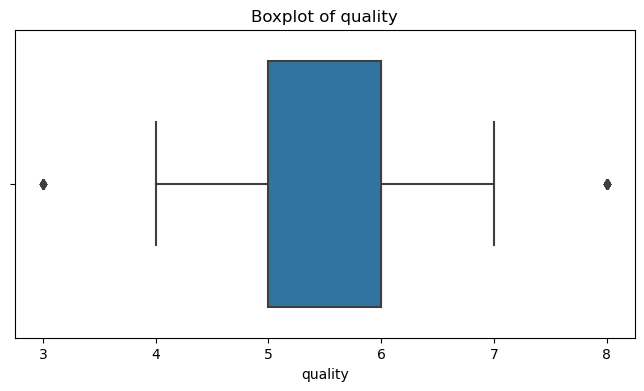

In [373]:
for i in wine_df2.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=wine_df2[i])
    plt.title(f'Boxplot of {i}')
    
    plt.show()

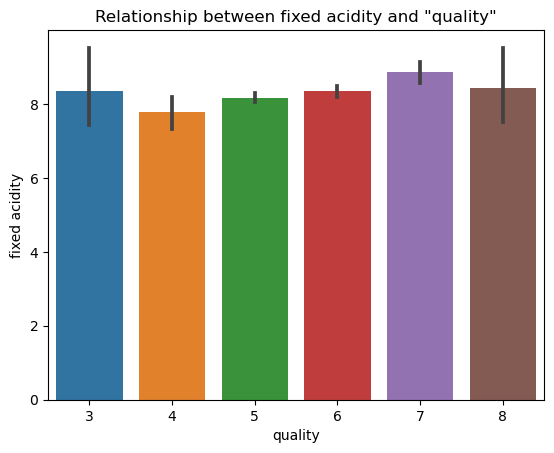

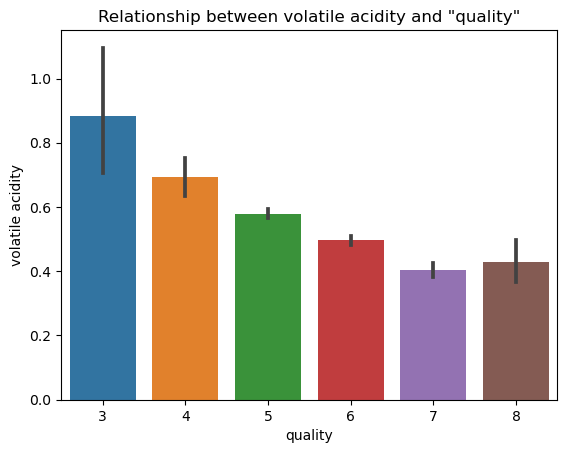

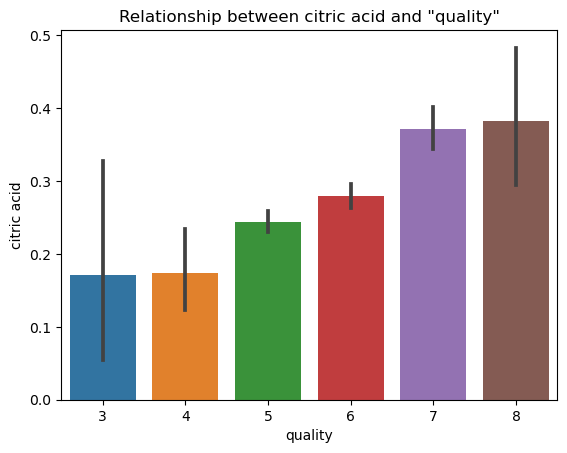

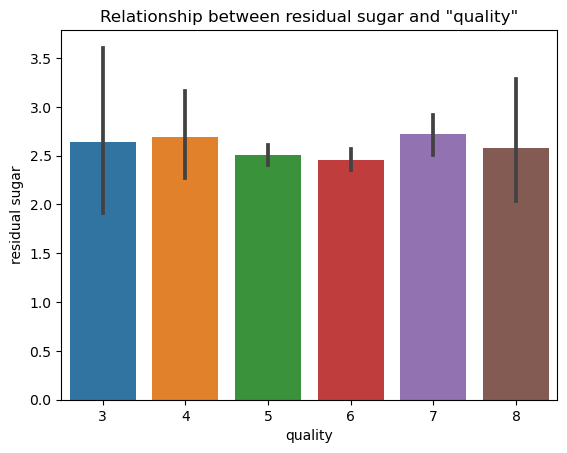

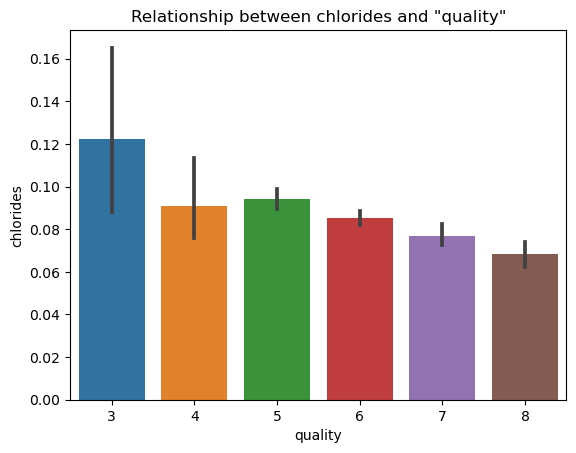

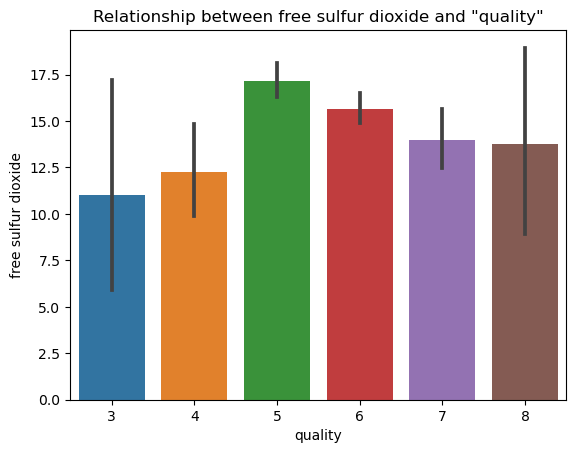

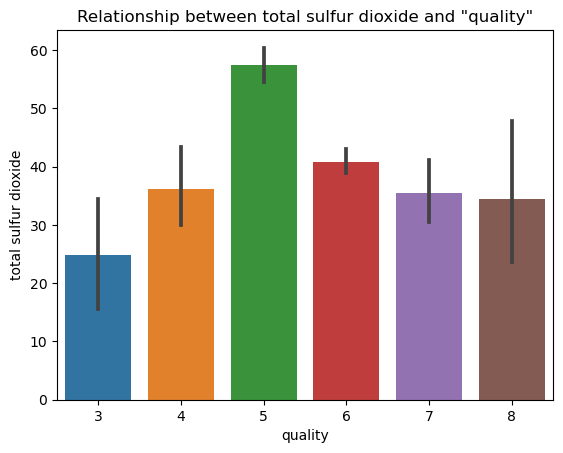

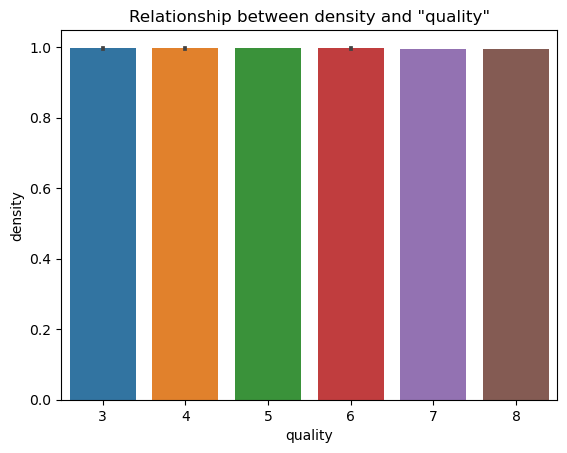

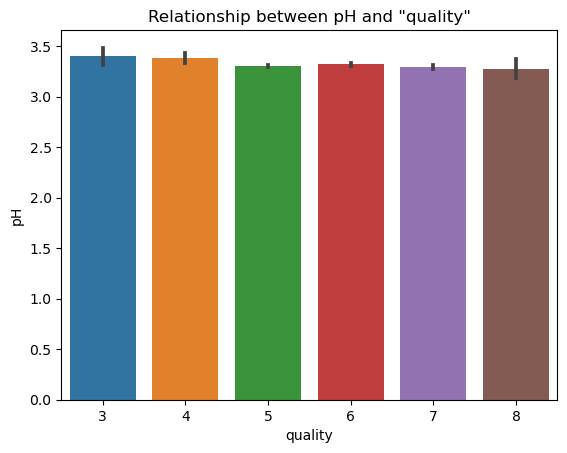

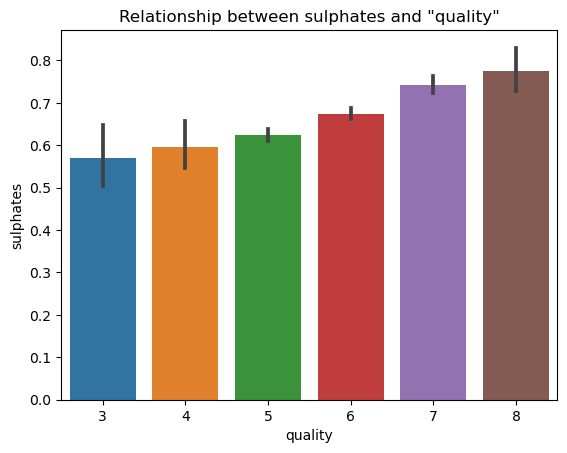

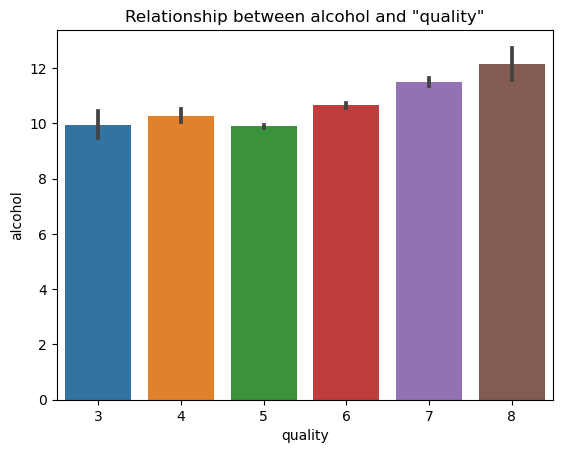

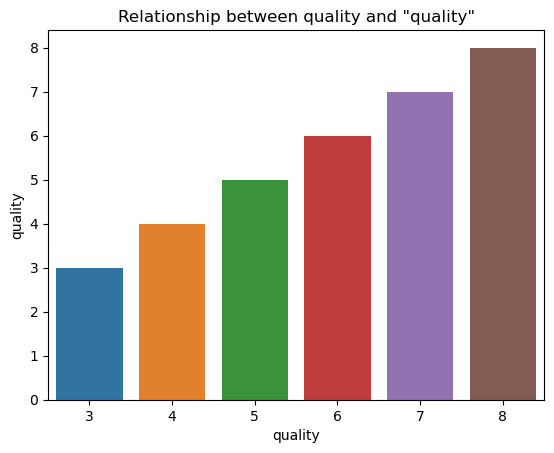

In [374]:
#bivariate analysis of physiochemical data columns comparing with sensory 'quality' column
wine_df_num=wine_df.select_dtypes(include=[np.number])

for col in wine_df2.columns:
    plt.figure()
    sns.barplot(x='quality', y =col, data=wine_df2)
    plt.title(f'Relationship between {col} and "quality"')
    plt.ylabel(col)
    plt.show()

__COMMENT__: all columns have outliers that must be handled to get a better overall result



In [378]:
#handling outliers with zscore
score_=np.abs(zscore(wine_df2))
threshold=3
outliers_=np.where(score_>threshold)


wine_df2=wine_df2[(score_<threshold).all(axis=1)]
wine_df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
__COMMENT__: now there are 1232 rows after removing outliers 

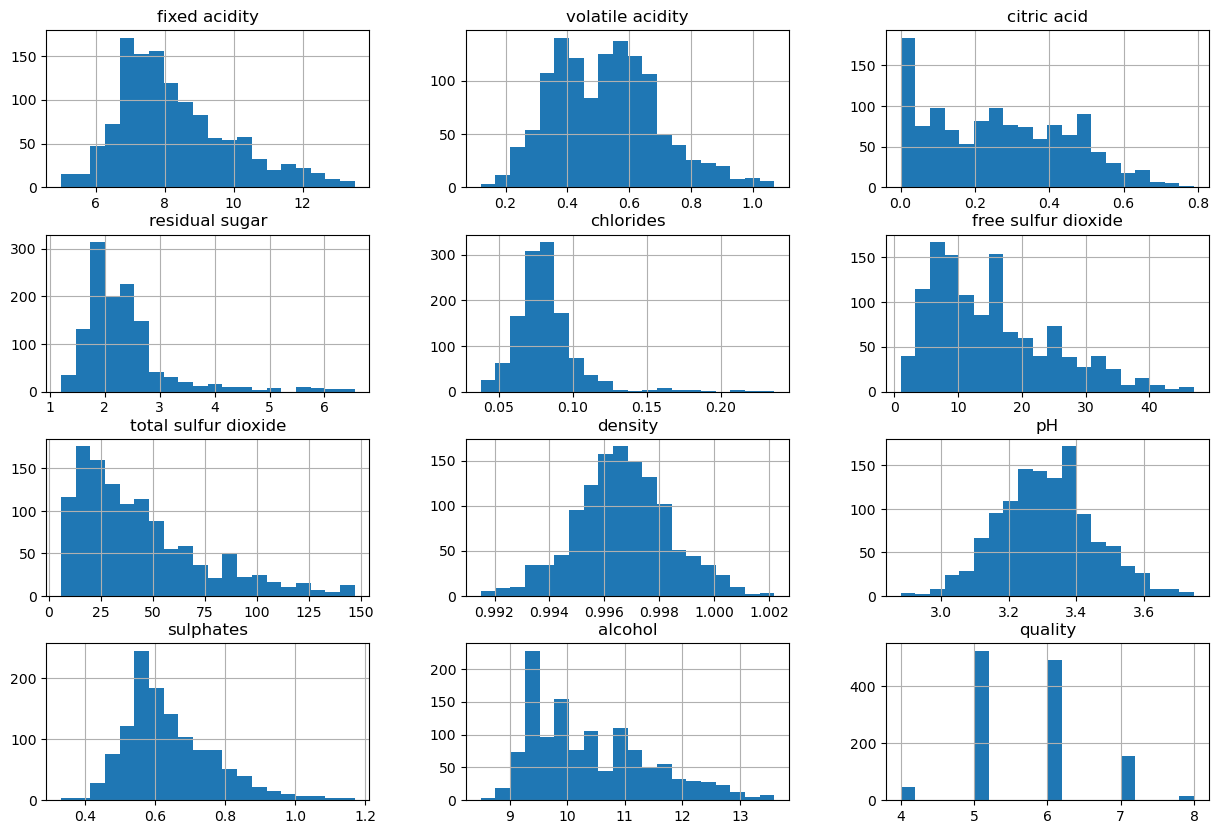

In [379]:
#histogram of each attribute after reducing 
wine_df2.hist(bins=20, figsize=(15,10))

plt.show()

In [ ]:
__COMMENT__: as we can see the number of rows has been reduced to 1232
    . there is a noticeable difference in the following :
        . residual sugar - has become more right skewed 
        chlorides is no longer normaly distributed 
        .tot sulfur dioxide has significant right skewness
        
        

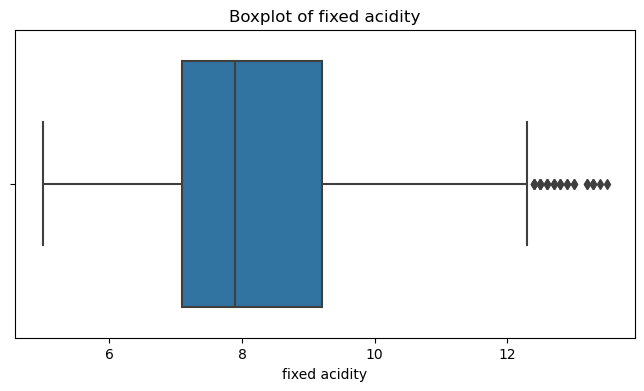

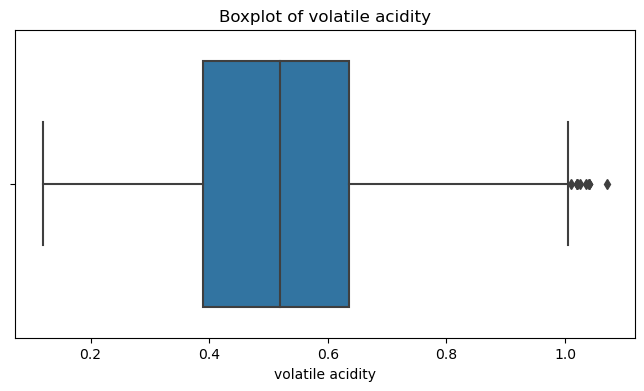

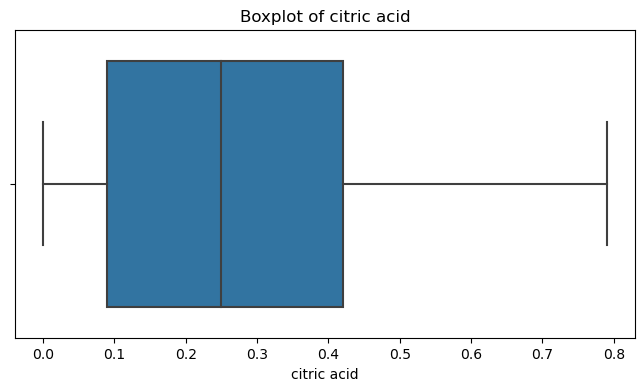

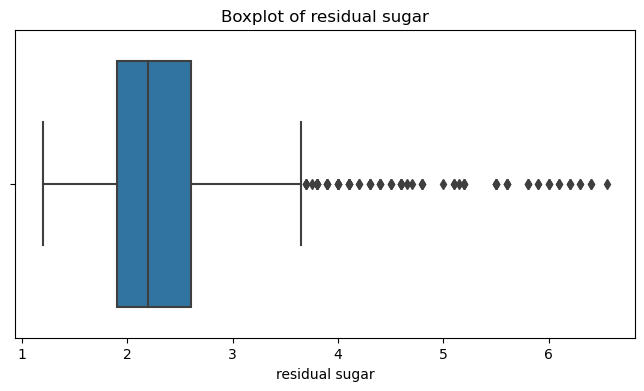

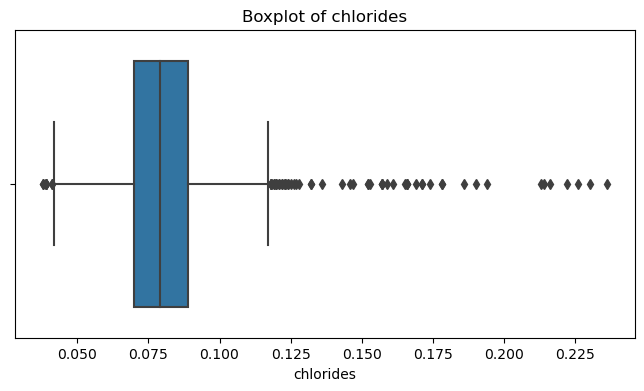

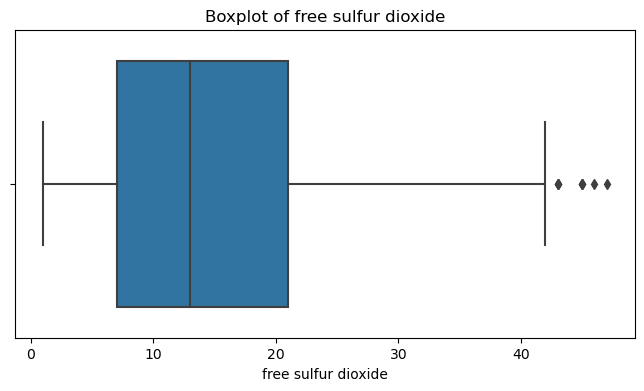

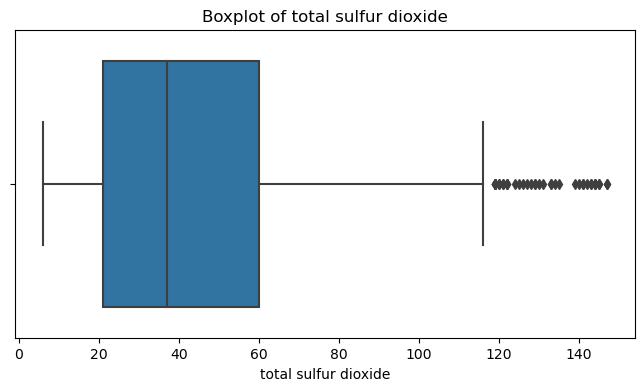

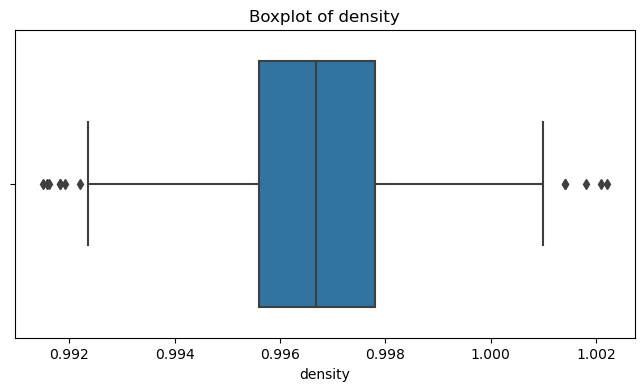

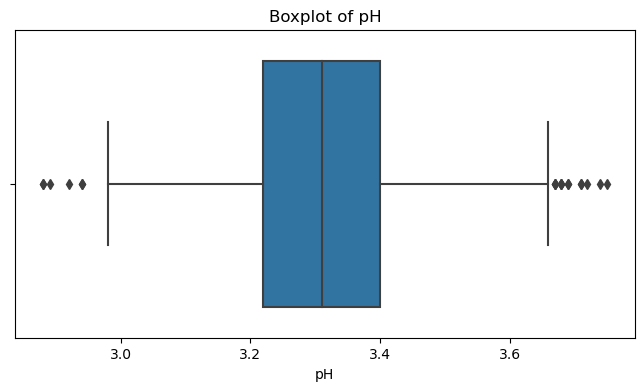

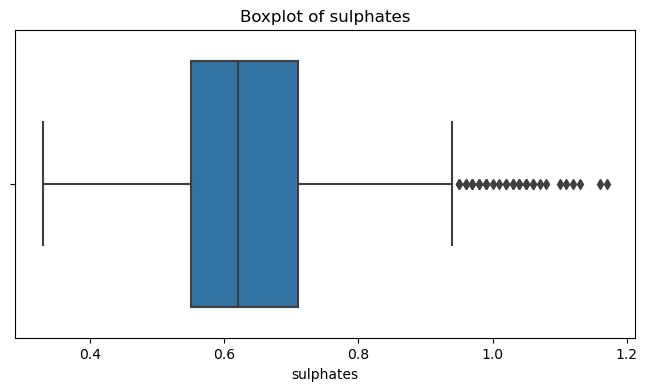

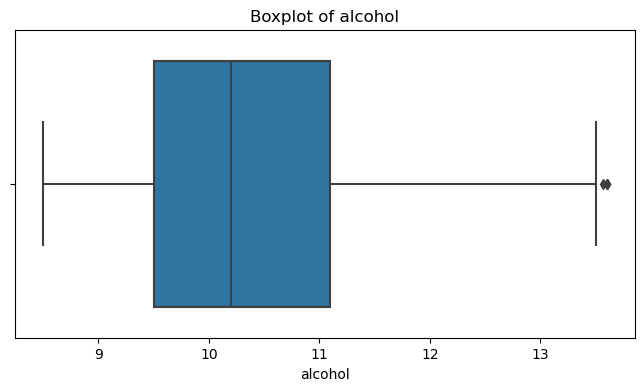

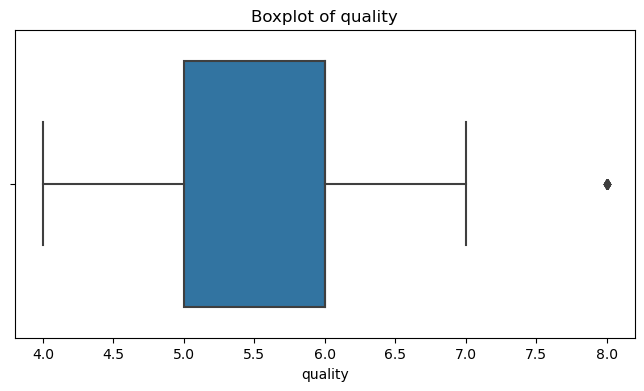

In [380]:
for i in wine_df2.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=wine_df2[i])
    plt.title(f'Boxplot of {i}')
    
    plt.show()

the heat map visualises the above table to give a good idea of the rlationships between these attributes. 

now, as stated in the problem statement, i will focus on the 'quality'. 
to start this, i will seperate the columns into input variables and target variable

In [469]:
wine_corr_=wine_df2.corr()
wine_corr_

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.586314,0.034444,0.081953,0.114398,0.004609,0.262100,-0.338508,-0.217095,-0.359736
citric acid,-0.586314,1.000000,0.175117,0.094445,0.012752,0.358471,-0.526370,0.313997,0.166913,0.245672
residual sugar,0.034444,0.175117,1.000000,0.104471,0.075256,0.330967,-0.079046,0.050731,0.161520,0.052219
chlorides,0.081953,0.094445,0.104471,1.000000,0.064625,0.300775,-0.181016,0.041176,-0.206772,-0.119767
total sulfur dioxide,0.114398,0.012752,0.075256,0.064625,1.000000,0.125982,-0.029544,-0.045177,-0.281309,-0.239612
density,0.004609,0.358471,0.330967,0.300775,0.125982,1.000000,-0.322901,0.122533,-0.482930,-0.179034
pH,0.262100,-0.526370,-0.079046,-0.181016,-0.029544,-0.322901,1.000000,-0.053683,0.139864,-0.078959
sulphates,-0.338508,0.313997,0.050731,0.041176,-0.045177,0.122533,-0.053683,1.000000,0.249283,0.385837
alcohol,-0.217095,0.166913,0.161520,-0.206772,-0.281309,-0.482930,0.139864,0.249283,1.000000,0.505716
quality,-0.359736,0.245672,0.052219,-0.119767,-0.239612,-0.179034,-0.078959,0.385837,0.505716,1.000000


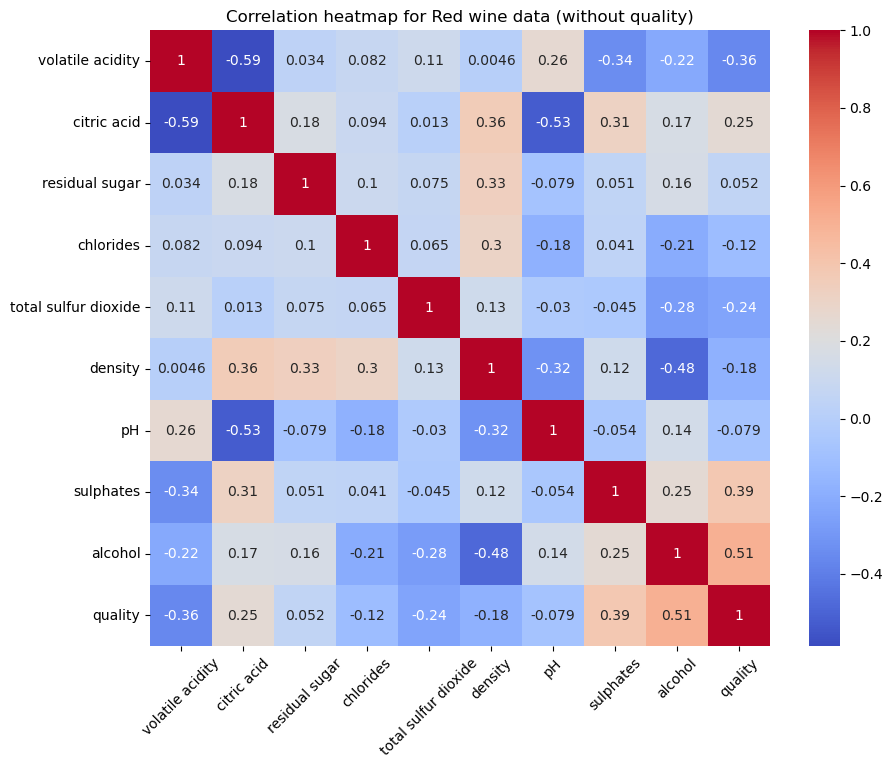

In [470]:
#heat map and correlation table to show the relation ships visually and numerically =wine_df2.corr()
plt.figure(figsize=(10,8))
heatmap=sns.heatmap(wine_corr_, annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)

plt.title('Correlation heatmap for Red wine data (without quality)')
plt.show()

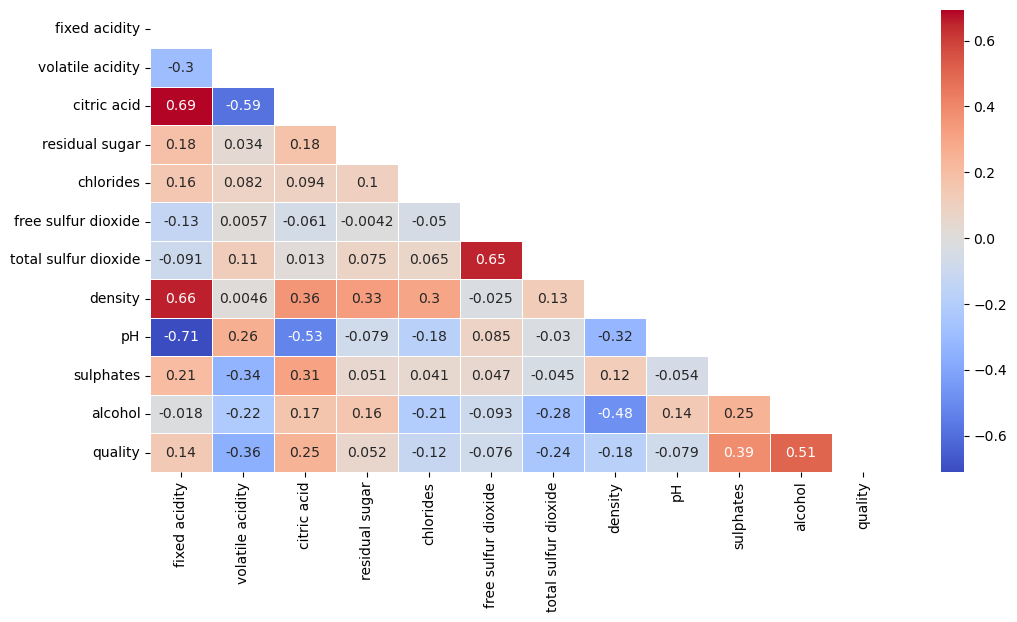

In [462]:
plt.figure(figsize=(12, 6))
matrx=np.tiu(corr_)
sns.heatmap(corr_, annot=True,)

In [464]:
#check correlation 
corr_qual=wine_df2.corr()['quality'].abs().sort_values(ascending=False)
print(corr_qual)

quality                 1.000000
alcohol                 0.505716
sulphates               0.385837
volatile acidity        0.359736
citric acid             0.245672
total sulfur dioxide    0.239612
density                 0.179034
chlorides               0.119767
pH                      0.078959
residual sugar          0.052219
Name: quality, dtype: float64


__COMMENT:__ all attributes have positive correlation with 'quality'

In [471]:
corr_

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.295842,0.693249,0.184156,0.155797,-0.131519,-0.091455,0.658659,-0.709816,0.205601,-0.017930,0.142221
volatile acidity,-0.295842,1.000000,-0.586314,0.034444,0.081953,0.005716,0.114398,0.004609,0.262100,-0.338508,-0.217095,-0.359736
citric acid,0.693249,-0.586314,1.000000,0.175117,0.094445,-0.061288,0.012752,0.358471,-0.526370,0.313997,0.166913,0.245672
residual sugar,0.184156,0.034444,0.175117,1.000000,0.104471,-0.004159,0.075256,0.330967,-0.079046,0.050731,0.161520,0.052219
chlorides,0.155797,0.081953,0.094445,0.104471,1.000000,-0.049994,0.064625,0.300775,-0.181016,0.041176,-0.206772,-0.119767
free sulfur dioxide,-0.131519,0.005716,-0.061288,-0.004159,-0.049994,1.000000,0.654184,-0.024826,0.084844,0.046576,-0.092870,-0.076318
total sulfur dioxide,-0.091455,0.114398,0.012752,0.075256,0.064625,0.654184,1.000000,0.125982,-0.029544,-0.045177,-0.281309,-0.239612
density,0.658659,0.004609,0.358471,0.330967,0.300775,-0.024826,0.125982,1.000000,-0.322901,0.122533,-0.482930,-0.179034
pH,-0.709816,0.262100,-0.526370,-0.079046,-0.181016,0.084844,-0.029544,-0.322901,1.000000,-0.053683,0.139864,-0.078959
sulphates,0.205601,-0.338508,0.313997,0.050731,0.041176,0.046576,-0.045177,0.122533,-0.053683,1.000000,0.249283,0.385837


In [477]:
#determin highly corellated columns to drop
corr_threshold = 0.7
mask_ = corr_.abs() >= corr_threshold
f_to_drop = set()

for i in range(len(corr_.columns)):
    for j in range(i+1, len(corr_.columns)):
        if mask_.iloc[i, j]:
            colname_i = corr_.columns[i]
            colname_j = corr_.columns[j]
            if colname_i not in f_to_drop:
                f_to_drop.add(colname_j)
print('Features to drop:', f_to_drop)

Features to drop: {'pH'}


__COMMENT__: Making it 0.7 i have only 'ph' to drop.
lets try 0.65


In [479]:
corr_threshold = 0.65
mask_ = corr_.abs() >= corr_threshold
f_to_drop = set()

for i in range(len(corr_.columns)):
    for j in range(i+1, len(corr_.columns)):
        if mask_.iloc[i, j]:
            colname_i = corr_.columns[i]
            colname_j = corr_.columns[j]
            if colname_i not in f_to_drop:
                f_to_drop.add(colname_j)
print('Features to drop:', f_to_drop)

Features to drop: {'density', 'citric acid', 'total sulfur dioxide', 'pH'}


In [485]:
filtered_wine_df=wine_df2.drop(columns=f_to_drop)

print('Filtered Dataframe:')
filtered_wine_df

Filtered Dataframe:


,volatile acidity,residual sugar,chlorides,sulphates,alcohol,quality
0,0.700,1.9,0.076,0.56,9.4,5
1,0.880,2.6,0.098,0.68,9.8,5
2,0.760,2.3,0.092,0.65,9.8,5
3,0.280,1.9,0.075,0.58,9.8,6
5,0.660,1.8,0.075,0.56,9.4,5
...,...,...,...,...,...,...
1593,0.620,1.9,0.068,0.82,9.5,6
1594,0.600,2.0,0.090,0.58,10.5,5
1595,0.550,2.2,0.062,0.76,11.2,6
1597,0.645,2.0,0.075,0.71,10.2,5
